# 1.4.12 Template Matching

In [14]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [14]:
img = cv2.imread('temple2.png',0)
img2 = img.copy()
template = cv2.imread('template.png',0)
w,h = template.shape[::-1]
# All the 6 methods for comparison in a list
methods = ['cv2.TM_CCOEFF', 'cv2.TM_CCOEFF_NORMED', 'cv2.TM_CCORR',
'cv2.TM_CCORR_NORMED', 'cv2.TM_SQDIFF', 'cv2.TM_SQDIFF_NORMED']

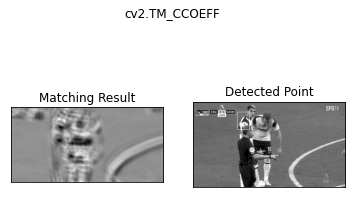

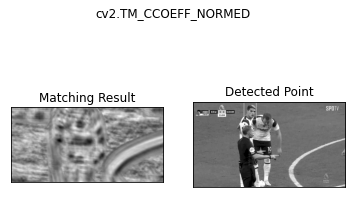

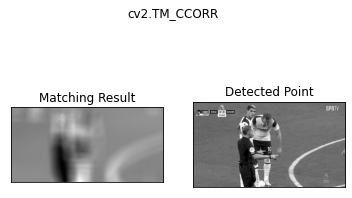

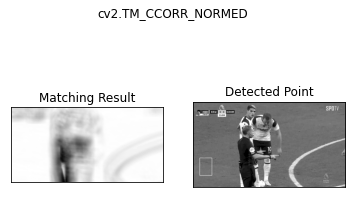

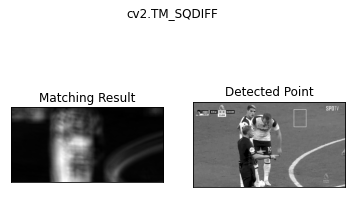

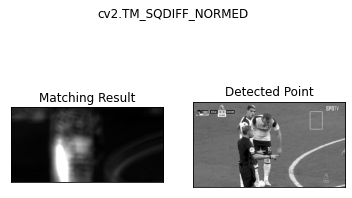

In [16]:
for meth in methods:
    img = img2.copy()
    method = eval(meth)
    # Apply template Matching
    res = cv2.matchTemplate(img,template,method)
    min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
    # If the method is TM_SQDIFF or TM_SQDIFF_NORMED, take minimum
    if method in [cv2.TM_SQDIFF, cv2.TM_SQDIFF_NORMED]:
        top_left = min_loc
    else:
        top_left = max_loc
    bottom_right = (top_left[0] + w, top_left[1] + h)
    cv2.rectangle(img,top_left, bottom_right, 255, 2)
    plt.subplot(121),plt.imshow(res,cmap = 'gray')
    plt.title('Matching Result'), plt.xticks([]), plt.yticks([])
    plt.subplot(122),plt.imshow(img,cmap = 'gray')
    plt.title('Detected Point'), plt.xticks([]), plt.yticks([])
    plt.suptitle(meth)
    plt.show()

In [17]:
img_rgb = cv2.imread('supermario.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
cv2.imshow('img_gray',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [13]:
template = cv2.imread('coin.png',0)
cv2.imshow('template',template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [11]:
w, h = template.shape[::-1]
print(w,h)

In [18]:
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
print(res)
cv2.imshow('res',res)
cv2.waitKey(0)
cv2.destroyAllWindows()

[[0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 [0.         0.         0.         ... 0.         0.         0.        ]
 ...
 [0.02023464 0.02607135 0.03129998 ... 0.03687026 0.0397896  0.04309693]
 [0.01827724 0.02326215 0.02758754 ... 0.02676545 0.02969497 0.03271462]
 [0.01843368 0.0226678  0.02618781 ... 0.01369364 0.01693792 0.02011649]]


In [20]:
res = cv2.matchTemplate(img_gray, template, cv2.TM_CCOEFF_NORMED)

In [22]:
min_val, max_val, min_loc, max_loc = cv2.minMaxLoc(res)
print(min_val, max_val, min_loc, max_loc)

-0.4025637209415436 0.3313647508621216 (854, 538) (695, 467)


In [23]:
res=(res-min_val)/(max_val-min_val)
print(res)

[[0.5485054  0.5485054  0.5485054  ... 0.5485054  0.5485054  0.5485054 ]
 [0.5485054  0.5485054  0.5485054  ... 0.5485054  0.5485054  0.5485054 ]
 [0.5485054  0.5485054  0.5485054  ... 0.5485054  0.5485054  0.5485054 ]
 ...
 [0.57607573 0.5840284  0.5911526  ... 0.5987423  0.60271996 0.6072263 ]
 [0.5734087  0.5802008  0.58609426 ... 0.5849741  0.5889657  0.59308004]
 [0.57362187 0.579391   0.5841871  ... 0.5671634  0.5715838  0.57591474]]


In [36]:
threshold = 0.8
loc = np.where( res >= threshold)

In [37]:
print(loc[::-1])

(array([ 598,  719,  900, ..., 1363, 1364, 1365], dtype=int64), array([   0,    0,    0, ..., 1019, 1019, 1019], dtype=int64))


In [38]:
img_rgb = cv2.imread('supermario.png') #mario hmson2
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)

In [40]:
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()
cv2.imwrite('res.png',img_rgb)

True

In [41]:
def nothing(x):
    pass

In [ ]:
cv2.namedWindow('image')
cv2.createTrackbar('threshold', 'image', 200, 255,nothing)
while(1):
    k = cv2.waitKey(1) & 0xFF
    if k == 27:
        break
    threshold = cv2.getTrackbarPos('threshold', 'image')
    loc = np.where(res >= threshold/255.)
    img_rgb = cv2.imread('supermario.png')
    for pt in zip(*loc[::-1]):
        cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (255,0,255), 1)
    cv2.imshow('image',img_rgb)
cv2.destroyAllWindows()

In [29]:
img_rgb = cv2.imread('temple1.png')
img_gray = cv2.cvtColor(img_rgb, cv2.COLOR_BGR2GRAY)
cv2.imshow('img_gray',img_gray)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [36]:
template = cv2.imread('template.png',0)
cv2.imshow('template',template)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [37]:
w, h = template.shape[::-1]
res = cv2.matchTemplate(img_gray,template,cv2.TM_CCOEFF_NORMED)
threshold = 0.5
loc = np.where( res >= threshold)
for pt in zip(*loc[::-1]):
    cv2.rectangle(img_rgb, pt, (pt[0] + w, pt[1] + h), (0,0,255), 1)
cv2.imshow('dst',img_rgb)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [33]:
cv2.imwrite('res1.png',img_rgb)

True